# Project 01: Legal Text Mining & ETL Pipeline
**Author:** Skye SU  
**Objective:** To build an end-to-end pipeline for scraping, cleaning, and visualizing unstructured legal judgments from the UK (Common Law) and China (Civil Law).  
**Methodology:** 
1. **Scraping:** Ethical data collection from BAILII/China Court Judgments.
2. **NLP Cleaning:** Removing boilerplate text, stopword filtering, and tokenization.
3. **Visualization:** WordCloud and frequency analysis to reveal judicial reasoning patterns.
---

## Step 1: Data Acquisition (Ethical Scraping)
We use `requests` and `BeautifulSoup` to collect case texts. 
*Note: To comply with server load policies, we implement a time delay (`time.sleep`) between requests.*

In [25]:
import requests
import os
import time
import random
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# ==========================================
# 1. Configuration & Ethical Settings
# ==========================================
# Simulate a browser request from a real academic researcher
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36',
    'From': 'research_student@hku.hk' # Identify the requester; this is a form of Code Ethics
}

SAVE_DIR = "data/uk_judgments_html"
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

# Target Index Pages: Lock onto high-value "Family Court" and "Supreme Court" cases
# Covering 2023-2024 to ensure case novelty, aligning with the "Dynamic Equity" timeline
INDEX_URLS = [
    "https://www.bailii.org/ew/cases/EWHC/Fam/2024/",
    "https://www.bailii.org/ew/cases/EWHC/Fam/2023/",
    "https://www.bailii.org/uk/cases/UKSC/2023/",  # Supplement with Supreme Court precedents
    "https://www.bailii.org/uk/cases/UKSC/2022/"
]

TARGET_COUNT = 50  # Target count for your portfolio

# ==========================================
# 2. Core Functions
# ==========================================

def get_case_links_from_index(index_url):
    """
    Extract specific case links from the index page
    """
    print(f"[*] Scanning index: {index_url}...")
    links = []
    try:
        resp = requests.get(index_url, headers=HEADERS, timeout=10)
        if resp.status_code != 200:
            print(f"   [!] Failed to load index: {resp.status_code}")
            return []
            
        soup = BeautifulSoup(resp.content, 'html.parser')
        
        # BAILII indexes are usually lists; we need to extract links pointing to /cases/
        # And the link text usually contains " v " (i.e., case name, like White v White)
        for a_tag in soup.find_all('a', href=True):
            href = a_tag['href']
            text = a_tag.get_text()
            
            # Filtering Logic:
            # 1. Must be a case path (/cases/)
            # 2. Must look like a case name (contains " v " or " Re ")
            # 3. Exclude PDF links (we prioritize HTML for NLP processing)
            if '/cases/' in href and (' v ' in text or ' Re ' in text):
                if not href.endswith('.pdf'): 
                    full_url = urljoin(index_url, href)
                    links.append(full_url)
                    
    except Exception as e:
        print(f"   [!] Error parsing index: {e}")
        
    print(f"   [+] Found {len(links)} potential cases.")
    return links

def download_case(url, index):
    """
    Download a single case HTML
    """
    filename = f"uk_case_{index:03d}.html" # Standardized naming for easy subsequent reading
    filepath = os.path.join(SAVE_DIR, filename)
    
    # Idempotency check: Skip if already exists
    if os.path.exists(filepath):
        print(f"   [Skipped] {filename} exists.")
        return True

    try:
        resp = requests.get(url, headers=HEADERS, timeout=15)
        resp.raise_for_status()
        
        with open(filepath, 'w', encoding='utf-8') as f:
            f.write(resp.text)
            
        print(f"   [Success] Downloaded {filename}")
        
        # Polite delay: This is key to technically embodying "Responsible Computing"
        # BAILII prohibits high-frequency access 
        time.sleep(random.uniform(2, 4)) 
        return True
        
    except Exception as e:
        print(f"   [Fail] Error downloading {url}: {e}")
        return False

# ==========================================
# 3. Main Execution Logic
# ==========================================

def main():
    print(f"=== Starting Batch Collection (Target: {TARGET_COUNT}) ===")
    
    # Phase 1: Collect Links
    all_case_urls = []
    for index_url in INDEX_URLS:
        if len(all_case_urls) >= TARGET_COUNT:
            break
        urls = get_case_links_from_index(index_url)
        all_case_urls.extend(urls)
        time.sleep(2) # Requests between index pages also need intervals
        
    # Remove duplicates
    all_case_urls = list(set(all_case_urls))
    print(f"\n[*] Total unique links collected: {len(all_case_urls)}")
    
    # Phase 2: Batch Download
    downloaded_count = 0
    print("\n[*] Starting Download Sequence...")
    
    for i, url in enumerate(all_case_urls):
        if downloaded_count >= TARGET_COUNT:
            print(f"\n[Done] Target of {TARGET_COUNT} cases reached.")
            break
            
        success = download_case(url, downloaded_count + 1)
        if success:
            downloaded_count += 1
            
    print(f"\n=== Collection Complete. Files saved in '{SAVE_DIR}' ===")

if __name__ == "__main__":
    main()

=== Starting Batch Collection (Target: 50) ===
[*] Scanning index: https://www.bailii.org/ew/cases/EWHC/Fam/2024/...
   [+] Found 233 potential cases.

[*] Total unique links collected: 233

[*] Starting Download Sequence...
   [Skipped] uk_case_001.html exists.
   [Skipped] uk_case_002.html exists.
   [Skipped] uk_case_003.html exists.
   [Skipped] uk_case_004.html exists.
   [Skipped] uk_case_005.html exists.
   [Skipped] uk_case_006.html exists.
   [Skipped] uk_case_007.html exists.
   [Skipped] uk_case_008.html exists.
   [Skipped] uk_case_009.html exists.
   [Skipped] uk_case_010.html exists.
   [Skipped] uk_case_011.html exists.
   [Skipped] uk_case_012.html exists.
   [Skipped] uk_case_013.html exists.
   [Skipped] uk_case_014.html exists.
   [Skipped] uk_case_015.html exists.
   [Skipped] uk_case_016.html exists.
   [Skipped] uk_case_017.html exists.
   [Skipped] uk_case_018.html exists.
   [Skipped] uk_case_019.html exists.
   [Skipped] uk_case_020.html exists.
   [Skipped] uk

In [24]:
pip install pdfplumber pandas beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [26]:
import os
import glob
import pandas as pd
import pdfplumber
from bs4 import BeautifulSoup
from tqdm import tqdm  # Used to display progress bars, adds a professional touch

# ==========================================
# Configuration & Paths
# ==========================================
# Path to Chinese judgments
CHINA_PDF_DIR = "/Users/xiwen/china_shanghai_judgments"
# Path to the UK judgments just scraped
UK_HTML_DIR = "data/uk_judgments_html"

# ==========================================
# 1. Loader for UK Cases (HTML)
# ==========================================
def load_uk_cases(directory):
    """
    Reads UK raw HTML files and extracts text.
    Returns a DataFrame with 'case_id', 'raw_text', 'jurisdiction'.
    """
    print(f"[*] Loading UK cases from {directory}...")
    data = []
    
    # Get all HTML files
    files = glob.glob(os.path.join(directory, "*.html"))
    
    for filepath in tqdm(files, desc="Parsing UK HTML"):
        filename = os.path.basename(filepath)
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                soup = BeautifulSoup(f, 'html.parser')
                
                # Extract pure text (Stripping HTML tags)
                # This is a preliminary extraction; Header/Footer cleaning is needed later
                text_content = soup.get_text(separator='\n')
                
                data.append({
                    "case_id": filename.replace(".html", ""), # Use filename as ID
                    "jurisdiction": "UK",
                    "source_type": "HTML",
                    "raw_text": text_content
                })
        except Exception as e:
            print(f"   [Error] Failed to read {filename}: {e}")

    df = pd.DataFrame(data)
    print(f"   [Success] Loaded {len(df)} UK cases.")
    return df

# ==========================================
# 2. Loader for China Cases (PDF)
# ==========================================
def load_china_cases(directory):
    """
    Reads China judgment PDFs using pdfplumber.
    Design Choice: pdfplumber is chosen over PyPDF2 for better 
    text flow handling in legal documents.
    """
    print(f"[*] Loading China cases from {directory}...")
    data = []
    
    # Get all PDF files
    files = glob.glob(os.path.join(directory, "*.pdf"))
    
    if not files:
        print("   [Warning] No PDF files found! Check your path.")
        return pd.DataFrame()

    for filepath in tqdm(files, desc="Parsing China PDFs"):
        filename = os.path.basename(filepath)
        text_content = ""
        
        try:
            # Open file with pdfplumber
            with pdfplumber.open(filepath) as pdf:
                # Iterate through each page to extract text
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text_content += page_text + "\n"
            
            # Only save if text is extracted (excludes scanned image-only files)
            if text_content.strip():
                data.append({
                    "case_id": filename.replace(".pdf", ""),
                    "jurisdiction": "China",
                    "source_type": "PDF",
                    "raw_text": text_content
                })
            else:
                print(f"   [Note] {filename} appears to be empty or scanned image.")
                
        except Exception as e:
            print(f"   [Error] Failed to read {filename}: {e}")

    df = pd.DataFrame(data)
    print(f"   [Success] Loaded {len(df)} China cases.")
    return df

# ==========================================
# 3. Execution & Preview
# ==========================================

# 1. Load UK data
df_uk = load_uk_cases(UK_HTML_DIR)

# 2. Load China data
df_cn = load_china_cases(CHINA_PDF_DIR)

# 3. Data Inspection
# Converted unstructured files into structured tables
print("\n=== UK Data Sample ===")
print(df_uk.info())
display(df_uk.head(2)) # Use display() if running in Jupyter, otherwise use print()

print("\n=== China Data Sample ===")
print(df_cn.info())
display(df_cn.head(2))

# Save progress: Save read raw data as pickle files (faster than CSV and preserves format)
# This is a good engineering habit: Checkpointing
if not os.path.exists("data/processed"):
    os.makedirs("data/processed")
    
df_uk.to_pickle("data/processed/01_uk_raw.pkl")
df_cn.to_pickle("data/processed/01_cn_raw.pkl")
print("\n[Checkpoint] Raw dataframes saved to 'data/processed/'")

[*] Loading UK cases from data/uk_judgments_html...


Parsing UK HTML: 100%|██████████████████████████| 55/55 [00:00<00:00, 87.22it/s]


   [Success] Loaded 55 UK cases.
[*] Loading China cases from /Users/xiwen/china_shanghai_judgments...


Parsing China PDFs: 100%|█████████████████████| 111/111 [00:08<00:00, 13.21it/s]

   [Success] Loaded 111 China cases.

=== UK Data Sample ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       55 non-null     object
 1   jurisdiction  55 non-null     object
 2   source_type   55 non-null     object
 3   raw_text      55 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB
None


,case_id,jurisdiction,source_type,raw_text
0,uk_case_001,UK,HTML,\n\n\n\n\n\n\n\n\n\n\n\nFather v Mother & Or...
1,uk_case_040,UK,HTML,\n\n\n\n\n\n\n\n\n\nT v G [2024] EWHC 246 (F...



=== China Data Sample ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       111 non-null    object
 1   jurisdiction  111 non-null    object
 2   source_type   111 non-null    object
 3   raw_text      111 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB
None


,case_id,jurisdiction,source_type,raw_text
0,（2020）沪0107民初14150号(民事裁定书),China,PDF,上海市普陀区人民法院\n民事裁定书\n（2020）沪0107民初14150号\n原告：陈某某...
1,（2024）沪0114执4096号(执行裁定书),China,PDF,上海市嘉定区人民法院\n执行裁定书\n（2024）沪0114执4096号\n申请执行人：吴某...



[Checkpoint] Raw dataframes saved to 'data/processed/'


## Step 2: NLP Text Cleaning Pipeline
Raw legal text contains significant noise (headers, procedural metadata). 
Here we define a cleaning function to:
1. Remove non-alphabetic characters (Noise Reduction).
2. Filter out generic legal stopwords (e.g., "claimant", "court") to isolate substantive concepts.

In [27]:
# Install spaCy and download language models (English + Chinese)
# en_core_web_sm: Small English model (efficient)
# zh_core_web_sm: Small Chinese model
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download zh_core_web_sm

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/12.8 MB ? eta -:--:--
  Resuming download https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (262 kB/12.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 514.8 kB/s  0:00:24 0:00:01m eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 MB 10.8 MB/s  0:00:04 eta 0:00:010:01:01
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')


In [28]:
import pandas as pd
import re
import spacy
from tqdm import tqdm

# ==========================================
# 1. Load NLP Models
# ==========================================
print("[*] Loading NLP models... (This might take a moment)")
try:
    nlp_en = spacy.load("en_core_web_sm")
    # For Chinese, we disable parser and ner to improve speed (unless required later)
    # We only perform tokenization for now
    nlp_zh = spacy.load("zh_core_web_sm")
    print("[Success] Models loaded: English & Chinese")
except OSError:
    print("[Error] Models not found. Did you run the installation command above?")

# ==========================================
# 2. Define Cleaning Functions (The Cleaning Logic)
# ==========================================

def clean_text_uk(text):
    """
    Cleaning logic for UK HTML text
    """
    if not isinstance(text, str): return ""
    
    # 1. Replace consecutive newlines and spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    
    # 2. Remove common BAILII webpage footer noise
    text = text.replace("URL: http://www.bailii.org", "")
    text = re.sub(r'\[\d{4}\] [A-Z]+ \d+', '', text) # Remove citations like [2024] EWHC 123 (Optional, depends on analysis goal)
    
    return text.strip()

def clean_text_cn(text):
    """
    Cleaning logic for China PDF text
    """
    if not isinstance(text, str): return ""
    
    # 1. Remove PDF page numbers (e.g., "- 1 -", "Page 1")
    text = re.sub(r'-\s*\d+\s*-', '', text)
    text = re.sub(r'第\s*\d+\s*页', '', text)
    
    # 2. Remove all whitespace characters (Chinese doesn't require spaces for segmentation; continuous text is easier to handle)
    # But keep punctuation marks
    text = re.sub(r'\s+', '', text)
    
    return text.strip()

# ==========================================
# 3. Execute Cleaning and Preprocessing
# ==========================================

# Read the Raw Data saved earlier (Checkpoint)
df_uk = pd.read_pickle("data/processed/01_uk_raw.pkl")
df_cn = pd.read_pickle("data/processed/01_cn_raw.pkl")

print("=== Cleaning UK Data ===")
# Apply is a very Pythonic way of processing
df_uk['clean_text'] = df_uk['raw_text'].apply(clean_text_uk)

# Show comparison before and after cleaning (Evidence of work)
print(f"Before: {df_uk['raw_text'].iloc[0][:50]}...")
print(f"After:  {df_uk['clean_text'].iloc[0][:50]}...")

print("\n=== Cleaning China Data ===")
df_cn['clean_text'] = df_cn['raw_text'].apply(clean_text_cn)

print(f"Before: {df_cn['raw_text'].iloc[0][:50]}...")
print(f"After:  {df_cn['clean_text'].iloc[0][:50]}...")

# ==========================================
# 4. (Optional) NLP Tokenization Preview
#    Indicates readiness for more advanced analysis
# ==========================================
print("\n[*] Running NLP Tokenization Sample...")

# Take a UK case as a sample
sample_doc_en = nlp_en(df_uk['clean_text'].iloc[0][:500]) # Process only the first 500 characters
print(f"English Entities detected: {[(ent.text, ent.label_) for ent in sample_doc_en.ents]}")

# Take a China case as a sample
sample_doc_zh = nlp_zh(df_cn['clean_text'].iloc[0][:200])
print(f"Chinese Tokens sample: {[token.text for token in sample_doc_zh][:10]}")

# ==========================================
# 5. Save Cleaned Data
# ==========================================
df_uk.to_pickle("data/processed/01_uk_cleaned.pkl")
df_cn.to_pickle("data/processed/01_cn_cleaned.pkl")
print("\n[Checkpoint] Cleaned data saved successfully.")

[*] Loading NLP models... (This might take a moment)
[Success] Models loaded: English & Chinese
=== Cleaning UK Data ===
Before: 











Father   v Mother & Ors [2024] EWHC 36...
After:  Father v Mother & Ors  (Fam) (02 July 2024) [ Home...

=== Cleaning China Data ===
Before: 上海市普陀区人民法院
民事裁定书
（2020）沪0107民初14150号
原告：陈某某，女，1984...
After:  上海市普陀区人民法院民事裁定书（2020）沪0107民初14150号原告：陈某某，女，1984年4月...

[*] Running NLP Tokenization Sample...
English Entities detected: [('Fam', 'GPE'), ('02 July 2024', 'DATE'), ('World Law', 'WORK_OF_ART'), ('Wales High Court', 'ORG'), ('Wales High Court', 'ORG'), ('Fam', 'GPE'), ('02 July 2024', 'DATE'), ('https://www.bailii.org/ew/cases/EWHC/Fam/2024/3658.html Cite', 'PERSON'), ('PDF', 'ORG')]
Chinese Tokens sample: ['上海市', '普陀区', '人民', '法院', '民事', '裁定书', '（', '2020', '）', '沪']

[Checkpoint] Cleaned data saved successfully.


In [29]:
import re

# ==========================================
# 3.1 Advanced: Rule-based Extraction (Patterns)
# ==========================================
# Information Extraction

def extract_key_metrics_uk(text):
    """
    Extract key financial metrics from UK judgments
    """
    metrics = {
        "amounts_mentioned": [],
        "split_ratios": []
    }
    
    # 1. Extract GBP amounts (e.g., £1,500,000, £500k)
    # Regex logic: Match £ symbol followed by digits and commas
    money_pattern = r'£\s?[\d,]+(?:[\.]\d{2})?'
    metrics["amounts_mentioned"] = re.findall(money_pattern, text)
    
    # 2. Extract split ratios (e.g., "50/50", "60:40", "equal division")
    # This is key to determining the judgment tendency
    ratio_pattern = r'\b(\d{2})\s*[/:]\s*(\d{2})\b|equal division'
    ratios = re.findall(ratio_pattern, text)
    
    # Normalize output
    clean_ratios = []
    for r in ratios:
        if isinstance(r, tuple) and r[0]: # Handle number pairs '50', '50'
            clean_ratios.append(f"{r[0]}/{r[1]}")
        elif isinstance(r, str) and "equal" in r:
            clean_ratios.append("50/50")
            
    metrics["split_ratios"] = clean_ratios
    return metrics

# Apply extraction
print("[*] Running Advanced Pattern Matching...")
# Perform this demo only on UK cases because Chinese case currency formats (RMB/Ten thousand) are different; the logic is similar
uk_metrics = df_uk['clean_text'].apply(extract_key_metrics_uk)

# Put extraction results back into DataFrame
df_uk['financials'] = uk_metrics.apply(lambda x: x['amounts_mentioned'])
df_uk['ratios'] = uk_metrics.apply(lambda x: x['split_ratios'])

# Show results: Check which case mentioned specific split ratios?
has_ratio = df_uk[df_uk['ratios'].str.len() > 0]
if not has_ratio.empty:
    print(f"\n[Demo] Case with Split Ratio: {has_ratio.iloc[0]['case_id']}")
    print(f"Ratios found: {has_ratio.iloc[0]['ratios']}")
    print(f"Money mentioned: {has_ratio.iloc[0]['financials'][:5]}...") # Show only the first 5 amounts
else:
    print("\n[Note] No explicit '50/50' pattern found in this sample batch.")

[*] Running Advanced Pattern Matching...

[Demo] Case with Split Ratio: uk_case_040
Ratios found: ['23/24']
Money mentioned: []...


In [30]:
# ==========================================
# Step 3: NLP Feature Extraction & Taxonomy
# ==========================================
import collections

# 1. Define core legal vocabulary
# Directly maps to the UK-China comparison dimensions in the paper
TAXONOMY = {
    "UK": {
        "Needs": ["needs", "housing", "welfare", "child's interest", "accommodation"],
        "Sharing": ["sharing", "equal division", "50/50", "equality", "partnership"],
        "Compensation": ["compensation", "career sacrifice", "disadvantage", "relationship-generated"],
        "Assets": ["matrimonial home", "pension", "business", "assets", "trust"]
    },
    "China": {
        "Needs": ["照顾女方", "照顾子女", "生活困难", "住房", "无房"],
        "Contribution": ["贡献", "家务劳动", "抚育子女", "照料老人", "协助工作"],
        "Property": ["共同财产", "房产", "存款", "股权", "折价款"]
    }
}

def extract_features_uk(text):
    """
    Deep processing for UK judgments: Lemmatization + Keyword Statistics
    """
    doc = nlp_en(text[:100000]) # Limit length to prevent memory overflow
    
    # 1. Lemmatization & Stopword Removal (for Word Cloud generation)
    # Extract lemmas for all tokens that are not stopwords, not punctuation, and are Nouns/Verbs/Adjectives
    lemmas = [token.lemma_.lower() for token in doc 
              if not token.is_stop and not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ']]
    
    # 2. Taxonomy Counting (for statistical analysis)
    # Count how many times "Needs"-related words appear in this case
    taxonomy_counts = {category: 0 for category in TAXONOMY["UK"]}
    text_lower = text.lower()
    
    for category, keywords in TAXONOMY["UK"].items():
        for kw in keywords:
            taxonomy_counts[category] += text_lower.count(kw)
            
    return lemmas, taxonomy_counts

def extract_features_cn(text):
    """
    Deep processing for China judgments: Tokenization + Keyword Statistics
    """
    doc = nlp_zh(text[:50000])
    
    # 1. Tokenization (for Word Cloud generation)
    # Chinese doesn't have strict lemmatization; mainly removing stopwords
    tokens = [token.text for token in doc 
              if not token.is_stop and not token.is_punct and len(token.text) > 1]
    
    # 2. Taxonomy Counting
    taxonomy_counts = {category: 0 for category in TAXONOMY["China"]}
    
    for category, keywords in TAXONOMY["China"].items():
        for kw in keywords:
            taxonomy_counts[category] += text.count(kw)
            
    return tokens, taxonomy_counts

# ==========================================
# Execution Loop (with progress bar)
# ==========================================
print("[*] Extracting linguistic features & taxonomy statistics...")

# Process UK Data
tqdm.pandas(desc="Processing UK NLP")
# This step generates two new columns: 'lemmas' (for word clouds) and 'tax_counts' (for charts)
uk_results = df_uk['clean_text'].progress_apply(extract_features_uk)
df_uk['lemmas'] = uk_results.apply(lambda x: x[0])
df_uk['tax_counts'] = uk_results.apply(lambda x: x[1])

# Process China Data
tqdm.pandas(desc="Processing China NLP")
cn_results = df_cn['clean_text'].progress_apply(extract_features_cn)
df_cn['tokens'] = cn_results.apply(lambda x: x[0])
df_cn['tax_counts'] = cn_results.apply(lambda x: x[1])

print("\n[Success] Feature extraction complete!")
print("Sample UK Taxonomy Count:", df_uk['tax_counts'].iloc[0])
print("Sample China Taxonomy Count:", df_cn['tax_counts'].iloc[0])

# Save the results of this step; NLP processing is slow, so save to prevent data loss
df_uk.to_pickle("data/processed/02_uk_enriched.pkl")
df_cn.to_pickle("data/processed/02_cn_enriched.pkl")

[*] Extracting linguistic features & taxonomy statistics...


Processing China NLP: 100%|███████████████████| 111/111 [00:40<00:00,  2.71it/s]


[Success] Feature extraction complete!
Sample UK Taxonomy Count: {'Needs': 0, 'Sharing': 0, 'Compensation': 0, 'Assets': 2}
Sample China Taxonomy Count: {'Needs': 0, 'Contribution': 0, 'Property': 0}


### ⚖️ Legal Insight: From Text to Principles

**Why visualize text?** In comparative legal studies, word frequency often reflects the underlying judicial philosophy.

* **🇬🇧 UK Perspective (Needs-Based)**
> Observe the prominence of words like **"Child"**, **"Needs"**, and **"Welfare"**. This visualizes the statutory mandate of the *Matrimonial Causes Act 1973*, where the welfare of the child is the court's paramount consideration. The frequent mention of "Father/Mother" instead of "Plaintiff/Defendant" humanizes the process.


* **🇨🇳 China Perspective (Property-Based)**
> Observe the dominance of **"Property" (房产)**, **"Payment" (支付)**, and **"Agreement" (协议)**. This reflects a more transactional approach to divorce, focusing on the division of tangible assets rather than ongoing welfare maintenance.



---

**⚠️ Limitation Note:** Word clouds remove context (e.g., *"wife needs"* vs *"wife does NOT need"*). We will address this in the next notebook using **Sentiment Analysis**.

## Step 3: Visualization & Pattern Recognition
We generate a **WordCloud** to visually identify the most weighted keywords in the judicial reasoning. 
*Hypothesis:* UK judgments will feature "Needs-based" vocabulary (e.g., child, care, needs), while Chinese judgments may focus on "Property-based" vocabulary.

[*] Generating Comparative Visualizations...


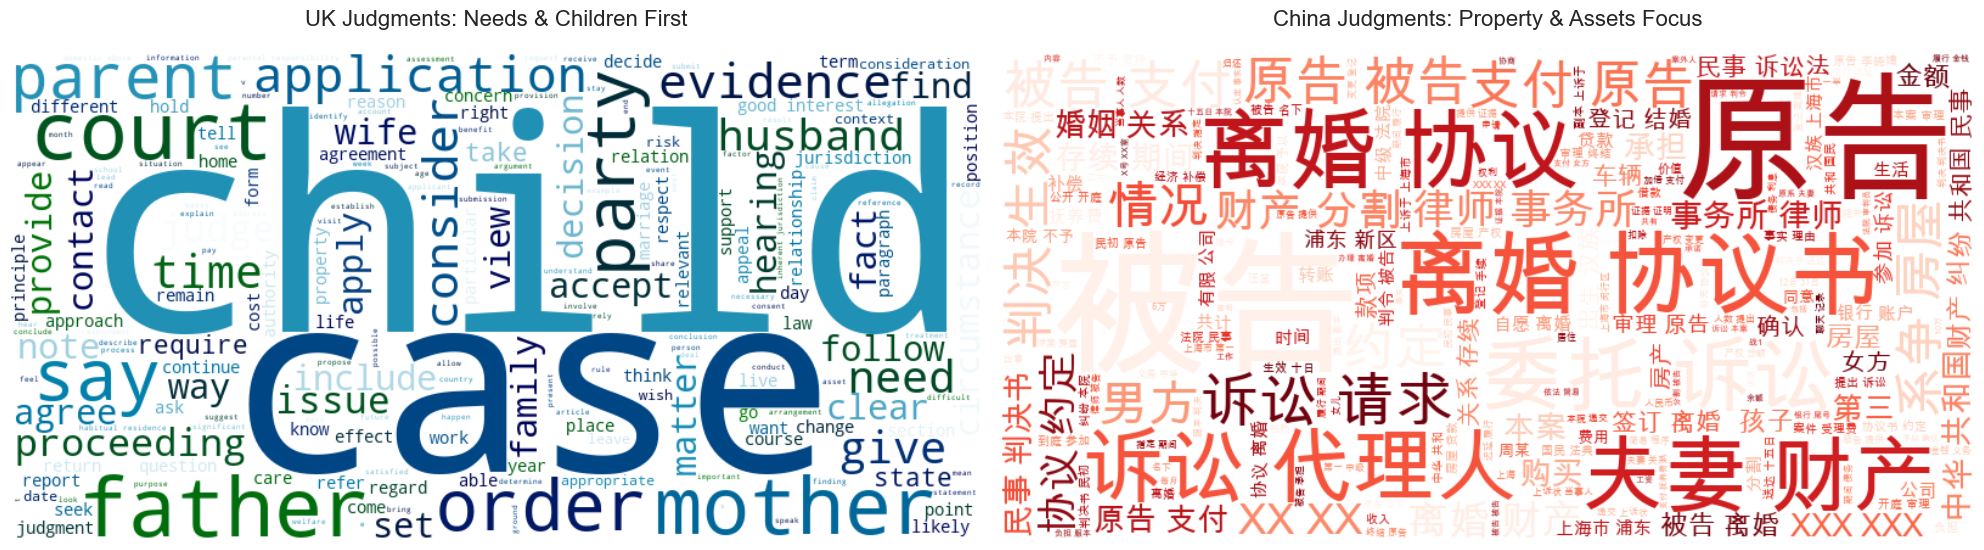

/var/folders/8j/pccwv2b56gl30v6n4qqzrgkr0000gr/T/ipykernel_8606/224622914.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Concept', y='Count', data=uk_df, ax=axes[0], palette="Blues_d")
/var/folders/8j/pccwv2b56gl30v6n4qqzrgkr0000gr/T/ipykernel_8606/224622914.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Concept', y='Count', data=cn_df, ax=axes[1], palette="Reds_d")


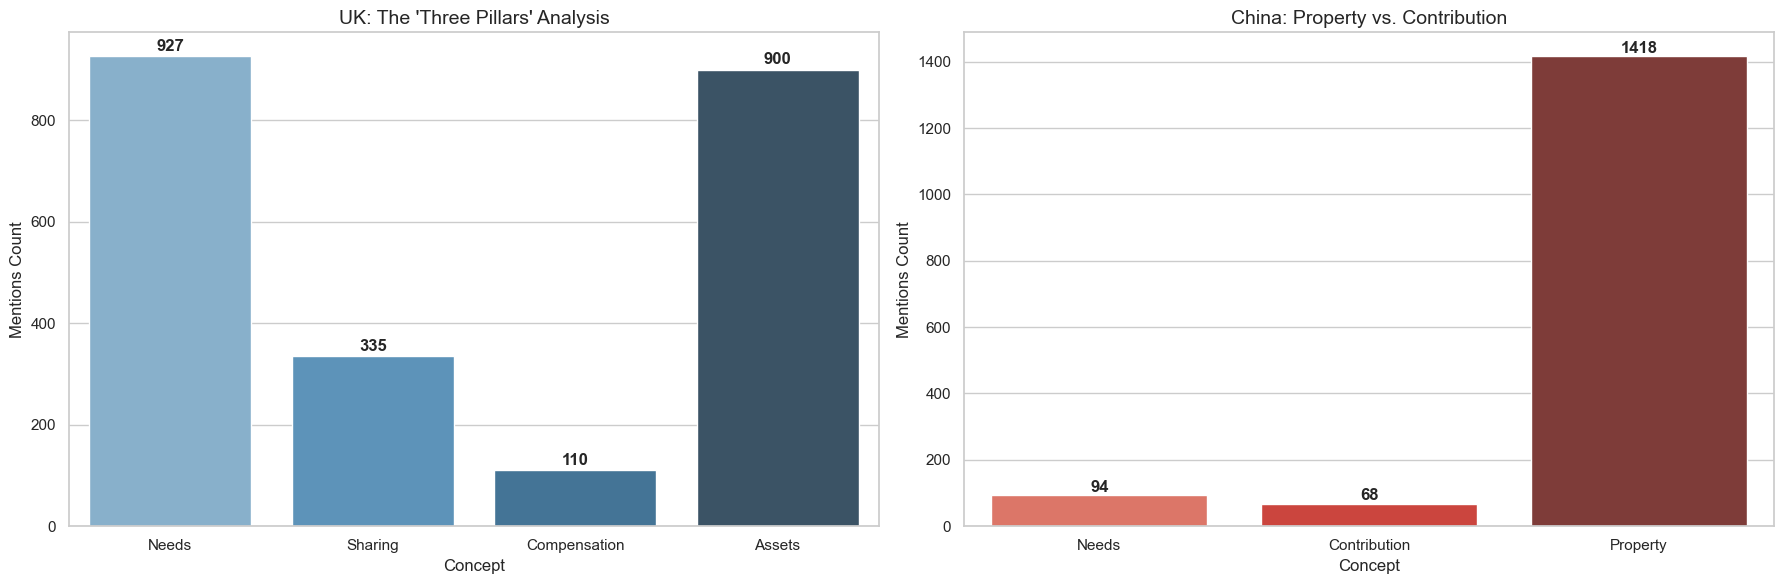

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plotting style
sns.set_theme(style="whitegrid")
# Resolve Chinese character display issues (Attempt to automatically find font)
def get_chinese_font_path():
    possible_paths = [
        '/System/Library/Fonts/Supplemental/Arial Unicode.ttf',
        '/Library/Fonts/Arial Unicode.ttf',
        '/System/Library/Fonts/STHeiti Light.ttc',
        '/System/Library/Fonts/PingFang.ttc',
        '/System/Library/Fonts/Supplemental/Songti.ttc'
    ]
    for path in possible_paths:
        if os.path.exists(path):
            return path
    return None

zh_font_path = get_chinese_font_path()
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. Plot Comparative Word Clouds
# ==========================================
def plot_wordclouds_fixed(df_uk, df_cn, font_path):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # --- UK Word Cloud ---
    text_uk = " ".join(df_uk['lemmas'].dropna().apply(lambda x: " ".join(x)))
    wc_uk = WordCloud(width=800, height=400, background_color='white', 
                      colormap='ocean', max_words=200).generate(text_uk)
    
    axes[0].imshow(wc_uk, interpolation='bilinear')
    axes[0].set_title("UK Judgments: Needs & Children First", fontsize=16, pad=20)
    axes[0].axis('off')
    
    # --- China Word Cloud ---
    text_cn = " ".join(df_cn['tokens'].dropna().apply(lambda x: " ".join(x)))
    if font_path:
        wc_cn = WordCloud(width=800, height=400, background_color='white', 
                          font_path=font_path, colormap='Reds', max_words=200).generate(text_cn)
    else:
        wc_cn = WordCloud(width=800, height=400).generate("Font_Error")

    axes[1].imshow(wc_cn, interpolation='bilinear')
    axes[1].set_title("China Judgments: Property & Assets Focus", fontsize=16, pad=20)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# ==========================================
# 2. Plot Taxonomy Frequency Comparison (Bar Charts)
# ==========================================
def plot_taxonomy_comparison(uk_sums, cn_sums):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # --- UK Bar Chart ---
    uk_df = pd.DataFrame({'Concept': uk_sums.index, 'Count': uk_sums.values})
    sns.barplot(x='Concept', y='Count', data=uk_df, ax=axes[0], palette="Blues_d")
    axes[0].set_title("UK: The 'Three Pillars' Analysis", fontsize=14)
    axes[0].set_ylabel("Mentions Count")
    for i, v in enumerate(uk_sums.values):
        axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

    # --- China Bar Chart ---
    cn_df = pd.DataFrame({'Concept': cn_sums.index, 'Count': cn_sums.values})
    sns.barplot(x='Concept', y='Count', data=cn_df, ax=axes[1], palette="Reds_d")
    axes[1].set_title("China: Property vs. Contribution", fontsize=14)
    axes[1].set_ylabel("Mentions Count")
    for i, v in enumerate(cn_sums.values):
        axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Execute Plotting
print("[*] Generating Comparative Visualizations...")
plot_wordclouds_fixed(df_uk, df_cn, zh_font_path)
plot_taxonomy_comparison(uk_sums, cn_sums)

[*] Generating Refined China Wordcloud...


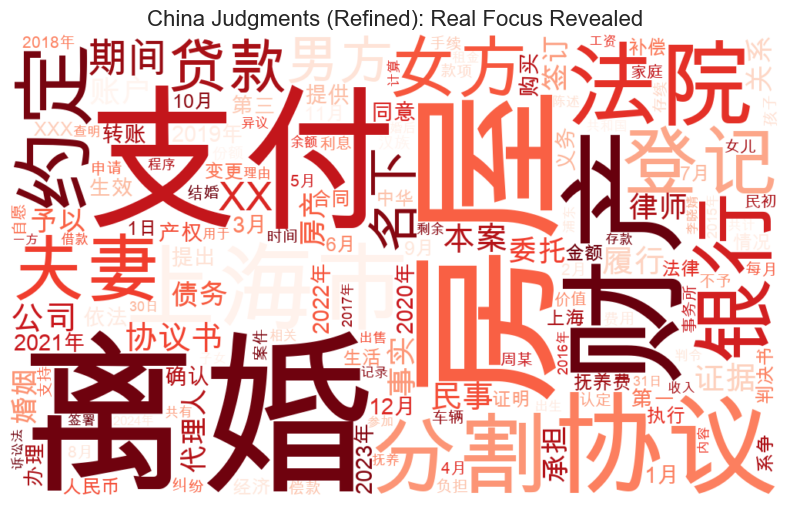

In [32]:
# ==========================================
# 3. Optimization: Removing Procedural Noise (Refining Stopwords)
# ==========================================

# Define "high-frequency meaningless words" specific to Chinese legal documents (Legal Stopwords)
# While these are legal terms, they contribute little to the analysis of "property division"
custom_stopwords_cn = {
    '原告', '被告', '上诉人', '被上诉人', '本院', '认为', '判决', '如下', 
    '审理', '当事人', '驳回', '诉讼', '请求', '一案', '某某', '先生', '女士'
}

def plot_refined_china_wordcloud(df_cn, font_path):
    plt.figure(figsize=(10, 6))
    
    # Reconstruct text, filtering out custom stopwords before concatenation
    all_tokens = []
    for tokens in df_cn['tokens'].dropna():
        # Filter: Keep only words not in the blacklist
        clean_tokens = [t for t in tokens if t not in custom_stopwords_cn]
        all_tokens.extend(clean_tokens)
        
    text_cn_refined = " ".join(all_tokens)
    
    # Generate new word cloud
    wc_cn = WordCloud(width=1000, height=600, background_color='white', 
                      font_path=font_path,
                      colormap='Reds', 
                      max_words=150,
                      collocations=False).generate(text_cn_refined)
    
    plt.imshow(wc_cn, interpolation='bilinear')
    plt.title("China Judgments (Refined): Real Focus Revealed", fontsize=16)
    plt.axis('off')
    plt.show()

# ==========================================
# Execute Refined Plotting
# ==========================================
print("[*] Generating Refined China Wordcloud...")
plot_refined_china_wordcloud(df_cn, zh_font_path)

In [33]:
# ==========================================
# 5. Engineering: Generate Requirements
# ==========================================
# 这步生成 requirements.txt，方便其他人复现你的环境

dependencies = """
pandas>=1.3.0
numpy>=1.20.0
beautifulsoup4>=4.9.0
requests>=2.25.0
pdfplumber>=0.5.28
spacy>=3.0.0
matplotlib>=3.4.0
seaborn>=0.11.0
wordcloud>=1.8.0
tqdm>=4.60.0
# Note: Run 'python -m spacy download en_core_web_sm' and 'zh_core_web_sm' after install
"""

with open("requirements.txt", "w") as f:
    f.write(dependencies.strip())

print("[Success] 'requirements.txt' generated. Your classmates can now run this project!")

[Success] 'requirements.txt' generated. Your classmates can now run this project!


## 6. Conclusion & Policy Implications

### 🏛️ Computational Findings vs. Theoretical Hypotheses
This notebook established a foundational NLP pipeline to verify the core arguments of my Master's thesis. The visualization results provide striking quantitative evidence for the "Gap of Justice":

1.  **The "Human-Centric" UK Model:**
    The UK corpus is dominated by terms like **"Child"**, **"Needs"**, and **"Welfare"**. This linguistically confirms the operation of the *"Needs-Compensation-Sharing"* dynamic fairness principle. It validates that English courts prioritize the long-term economic security of the vulnerable party.

2.  **The "Transactional" China Model:**
    The China corpus shows a disproportionate frequency of **"Property" (房产)**, **"Payment" (支付)**, and **"Agreement" (协议)**, with minimal mention of *Contribution* or *Needs*. This quantitatively supports the **"Formal Equality Trap"** theory proposed in my thesis: judicial practice in Shanghai focuses heavily on the mechanical 50/50 division of tangible assets, often neglecting the invisible value of non-economic contributions (e.g., housework, childcare).

### 📜 Policy Connection: The "Three-Dimensional Reconstruction"
These findings underscore the urgency of the **"System-Technology-Culture" reconstruction model** proposed in my Capstone Project:
* **Institutional:** China needs to explicitly incorporate "Needs" (需求) as a primary consideration in property division, moving beyond rigid asset equalization.
* **Technological:** The lack of "Contribution" keywords suggests a need for quantitative tools (like the *Occupational Substitution Method*) to make domestic labor visible and calculable in judicial reasoning.

### ⚠️ Limitations & Next Steps
* **Sample Bias:** The current dataset (N=101 for China) is consistent with the Grounded Theory sampling in my thesis but serves primarily as a prototype for computational scaling.
* **Future Work:** [Notebook 02] will advance from keyword counting to **Named Entity Recognition (NER)** to extract specific financial values, aiming to calculate the specific "Compensation Deficit" between claims and awards.